In [1]:
import numpy as np
import math
from munkres import Munkres
from matplotlib import pyplot as plt

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance

## Fonctions de base

Les fonctions de base se trouvent dans les fichiers:
* ```descriptor.py``` pour le calcul des descripteurs, la fonction ```compute_descriptor``` retourne une liste de descripteurs et prend en entrée un signal.
* ```wasserstein_distance.py```: la fonction ```compute_wasserstein_distance``` calcule la distance de Wasserstein entre deux ensembles de signaux. La distance utilisée par défaut est la norme des différences des vecteurs.

## Tests des fonctions

### Equations ressort avec frottements

$\frac{d^2V}{dt^2} = -kV - F\frac{dV}{dt}$

In [2]:
T = 100
dt = 1

In [3]:
def compute_ressort(T, dt, V_0, V_1, F, k, Vmin, Vmax, noise=False, sigma=0):
    V = np.zeros((T, ))
    V[0] = V_0
    V[1] = V_1
    for t in range(2, T):
        V[t] = -dt**2*(k*V[t-1]) + 2*V[t-1] - V[t-2] - dt*F*(V[t-1] - V[t-2])
        if noise:
            V[t] += np.random.normal(0, sigma)
        if V[t] < Vmin:
            F = - F
        elif V[t] > Vmax:
            F= - F
    Y = np.random.binomial(1, min(0.9, abs(F) + sigma), 1)
    print(Y)

    return V, Y

In [4]:
V1,Y1 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.1, k=1, Vmin=0.05, Vmax=2)

[0]


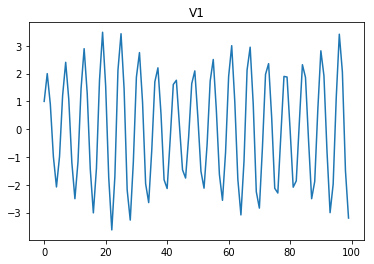

In [5]:
plt.plot(range(T), V1)
plt.title('V1')
plt.show()

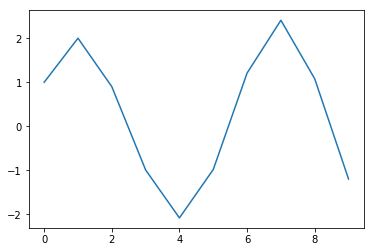

In [6]:
plt.plot(range(10), V1[:10])
plt.show()

In [7]:
V2,Y2 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)
V3,Y3 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)
V4,Y4 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.2, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.2)

[0]
[0]
[0]


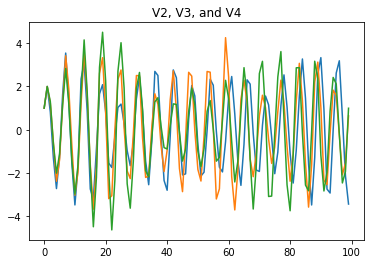

In [8]:
plt.plot(range(T), V2, range(T), V3, range(T), V4)
plt.title('V2, V3, and V4')
plt.show()

In [11]:
desc1 = compute_descriptor(V1)
desc2 = compute_descriptor(V2)
desc1 = np.concatenate((desc1,Y1))
desc2 = np.concatenate((desc2,Y2))
desc3 = compute_descriptor(V3)
desc3 = np.concatenate((desc3,Y3))
desc4 = compute_descriptor(V4)
desc4 = np.concatenate((desc4,Y4))
desc1, desc2

(array([  1.11561035e-02,   1.93825786e+00,  -3.62558128e+00,
          1.25033501e+02,  -1.70000000e-01,   0.00000000e+00]),
 array([  3.86726267e-03,   1.91026800e+00,  -3.47197559e+00,
          1.25389100e+02,  -1.70000000e-01,   0.00000000e+00]))

#### Calcule de la distance

In [14]:
from wasserstein_distance import distance_EMD, dist_norm

distance_EMD([desc1, desc1, desc1], [desc2, desc3, desc4], dist_norm)

([(0, 2), (1, 1), (2, 0)], 3.2486535732957447)

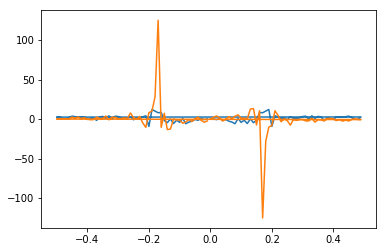

In [15]:
sp = np.fft.fft(V2)
freq = np.fft.fftfreq(T, dt)
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

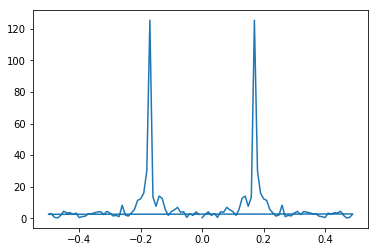

In [16]:
plt.plot(freq, abs(sp))
plt.show()

In [14]:
#def autocorr(x, t=0):
    #np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))
    #np.corrcoef(x)